In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import vtk

In [4]:
yhalf = 4/2
xcrack = 4
ycrack = 4
n = 16

In [5]:
xarea = np.array([0,10,10,0,0])
yarea = np.array([0,0,10,10,0])

In [6]:
xareaPD = np.array([0.04,0.1,0.1,0.04,0.04]) * 100
yareaPD = np.array([0.03,0.03,0.07,0.07,0.03]) * 100

In [7]:
hy = yhalf/n
h = (yhalf-hy/2) / n
h 

0.12109375

In [8]:
delta = 4 * h
delta

0.484375

In [9]:
x = []
y = []
volume = []
for j in range(0,int(ycrack/h)+1):
    for i in range(0,int(6/h)):
        x.append(4+i*h)
        y.append(3+j*h)
        if i == 0 or i == int(6/h)-1 or j == 0 or j == int(ycrack/h) :
            volume.append(h*h/2)
        else:
            volume.append(h*h)
        
    

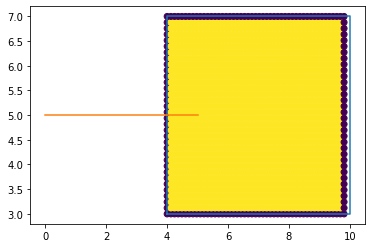

In [10]:
plt.plot(xareaPD,yareaPD)
plt.plot([0.,5],[5,5])
plt.scatter(x,y,c=volume)

In [11]:
min(x)

4.0

In [12]:
min(y)

3.0

In [13]:
max(x)

9.8125

In [14]:
max(y)

6.99609375

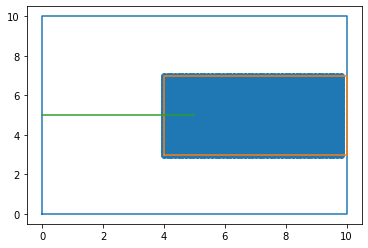

In [15]:
plt.plot(xarea,yarea)
plt.plot(xareaPD,yareaPD)
plt.plot([0.0,5],[5,5])
plt.scatter(x,y)

In [16]:
writer = vtk.vtkXMLUnstructuredGridWriter()
writer.SetFileName("coupling_"+str(n)+".vtu")
grid = vtk.vtkUnstructuredGrid()
points = vtk.vtkPoints()
points.SetNumberOfPoints(len(x))
points.SetDataTypeToDouble()

for i in range(0,len(x)):
    points.InsertPoint(i,x[i],y[i],0.)
    
grid.SetPoints(points)


dataOut = grid.GetPointData()
array = vtk.vtkDoubleArray()
array.SetName("Volumes")
array.SetNumberOfComponents(1)
array.SetNumberOfTuples(len(x))

for i in range(0,len(x)):
    array.SetTuple1(i,volume[i])
dataOut.AddArray(array)


writer.SetInputData(grid)
writer.GetCompressor().SetCompressionLevel(0)
writer.SetDataModeToAscii()
writer.Write()

1

In [17]:
%%bash 
ls

construct-aligned-mesh.ipynb
coupling_16.vtk
coupling_16.vtu
coupling_32.vtk
coupling_32.vtu
damage-16-18.png
input-15-32.yaml
input-15.yaml
input-18-32.yaml
input-18.yaml
input-19.yaml
input-20.yaml
input-9.yaml
input-pd.yaml
input.yaml
mesh.geo
mesh.msh
out-16-15
out-16-18
out-16-19
out-16-20
out-16-9
out-32-15
out-32-18
out-32-20
out-pd
pd-large1.png
pd-large2.png
pd-plot-d.png
pd-plot.png
pd-plot-u.png
pum_mesh_coupling_16_sides_simple_coupling_time_step_15_of_100_new_force.vtu
pum_mesh_coupling_16_sides_simple_coupling_time_step_18_of_100_new_force.vtu
pum_mesh_coupling_16_sides_simple_coupling_time_step_19_of_100_new_force.vtu
pum_mesh_coupling_16_sides_simple_coupling_time_step_20_of_100_new_force.vtu
pum_mesh_coupling_32_sides_simple_coupling_time_step_10_of_100_new_force.vtu
pum_mesh_coupling_32_sides_simple_coupling_time_step_15_of_100_new_force.vtu
pum_mesh_coupling_32_sides_simple_coupling_time_step_18_of_100_new_force.vtu


In [18]:
import meshio

In [19]:
points = []
cells = []
for i in range(0,len(x)):
    points.append([x[i],y[i],0])
    cells.append(("vertex", [[i]]))

In [20]:
mesh = meshio.Mesh(
    points,
    cells,
    # Optionally provide extra data on points, cells, etc.
    point_data={"Volume": volume},
    # Each item in cell data must match the cells array
)
mesh.write(
    "coupling_"+str(n)+".vtk",  # str, os.PathLike, or buffer/open file
    # file_format="vtk",  # optional if first argument is a path; inferred from extension
)

In [21]:
%%bash 
ls

construct-aligned-mesh.ipynb
coupling_16.vtk
coupling_16.vtu
coupling_32.vtk
coupling_32.vtu
damage-16-18.png
input-15-32.yaml
input-15.yaml
input-18-32.yaml
input-18.yaml
input-19.yaml
input-20.yaml
input-9.yaml
input-pd.yaml
input.yaml
mesh.geo
mesh.msh
out-16-15
out-16-18
out-16-19
out-16-20
out-16-9
out-32-15
out-32-18
out-32-20
out-pd
pd-large1.png
pd-large2.png
pd-plot-d.png
pd-plot.png
pd-plot-u.png
pum_mesh_coupling_16_sides_simple_coupling_time_step_15_of_100_new_force.vtu
pum_mesh_coupling_16_sides_simple_coupling_time_step_18_of_100_new_force.vtu
pum_mesh_coupling_16_sides_simple_coupling_time_step_19_of_100_new_force.vtu
pum_mesh_coupling_16_sides_simple_coupling_time_step_20_of_100_new_force.vtu
pum_mesh_coupling_32_sides_simple_coupling_time_step_10_of_100_new_force.vtu
pum_mesh_coupling_32_sides_simple_coupling_time_step_15_of_100_new_force.vtu
pum_mesh_coupling_32_sides_simple_coupling_time_step_18_of_100_new_force.vtu


In [22]:
mesh = meshio.read(
    "coupling_"+str(n)+".vtk",  # string, os.PathLike, or a buffer/open file
    # file_format="stl",  # optional if filename is a path; inferred from extension
    # see meshio-convert -h for all possible formats
)